In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

unencoded:
        t  count      mean  std
0    0.01     10  0.000007  0.0
1    0.02     10  0.000026  0.0
2    0.03     10  0.000059  0.0
3    0.04     10  0.000105  0.0
4    0.05     10  0.000165  0.0
..    ...    ...       ...  ...
495  4.96     10  0.322300  0.0
496  4.97     10  0.323261  0.0
497  4.98     10  0.324224  0.0
498  4.99     10  0.325189  0.0
499  5.00     10  0.326156  0.0

[500 rows x 4 columns]


encoded, lamb=64:
        t  count      mean  std
0    0.01     10  0.016964  0.0
1    0.02     10  0.008247  0.0
2    0.03     10  0.012082  0.0
3    0.04     10  0.016226  0.0
4    0.05     10  0.001257  0.0
..    ...    ...       ...  ...
495  4.96     10  0.015007  0.0
496  4.97     10  0.019275  0.0
497  4.98     10  0.016282  0.0
498  4.99     10  0.018173  0.0
499  5.00     10  0.019800  0.0

[500 rows x 4 columns]


encoded, lamb=64:
        t  count      mean  std
0    0.01     10  0.016968  0.0
1    0.02     10  0.008255  0.0
2    0.03     10  0.012081  0.0
3    

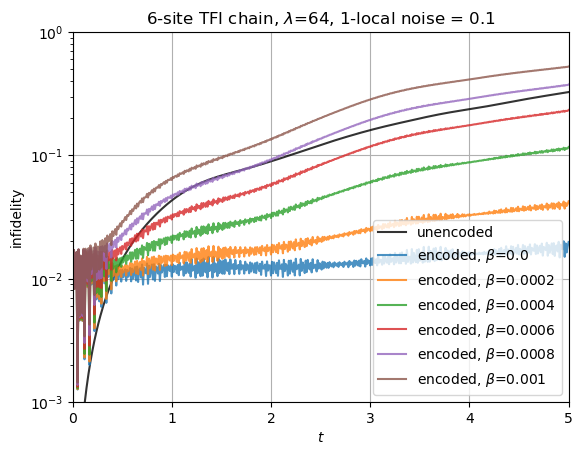

In [10]:
lamb = 64

##### unencoded #####
# for noise2loc in [0.0, 0.0002, 0.0004, 0.0006, 0.0008]:
for noise2loc in [0.0]:
    data_t, data_seed, data_infidelity = [], [], []

    f = open(f"1dTFIM_sweep_time_unencoded_6qubits_noise1loc=0.1_noise2loc={noise2loc}.txt")
    for line in f.readlines():
        line = line.strip().replace("#qubits =", "").replace("noise1loc =", "").replace("noise2loc =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace(",", "")
        _, _, _, t, seed, innerprod = line.split()
        data_t.append(float(t))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "t": data_t,
        "seed": data_seed,
        "infidelity": data_infidelity
    })

    newdf = df.groupby("t")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print("unencoded:")
    print(newdf)
    print("\n")
    t_arr = newdf["t"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    # plt.plot(t_arr, mean_arr, label=r"unencoded, $\beta$=" + f"{noise2loc}", alpha = 0.8)
    plt.plot(t_arr, mean_arr, label="unencoded", alpha = 0.8, color="black")
    plt.fill_between(t_arr, mean_arr + std_arr, mean_arr - std_arr, alpha = 0.5)


##### encoded #####
for noise2loc in [0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001]:
    data_t, data_seed, data_infidelity = [], [], []

    f = open(f"1dTFIM_sweep_time_3blocks_noise1loc=0.1_noise2loc={noise2loc}_lamb={lamb}.txt")
    cnt = 0
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise1loc =", "").replace("noise2loc =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, _, _, t, seed, innerprod, _, _ = line.split()
        if cnt % 1 == 0:
            data_t.append(float(t))
            data_seed.append(int(seed))
            data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
        cnt += 1
    f.close()

    df = pd.DataFrame(data={
        "t": data_t,
        "seed": data_seed,
        "infidelity": data_infidelity
    })

    newdf = df.groupby("t")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"encoded, lamb={lamb}:")
    print(newdf)
    print("\n")
    t_arr = newdf["t"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.plot(t_arr, mean_arr, label= r"encoded, $\beta$=" + f"{noise2loc}", alpha = 0.8)
    plt.fill_between(t_arr, mean_arr + std_arr, mean_arr - std_arr, alpha = 0.5)

plt.ylim(0.001,1.0)
plt.xlim(0, 5)
plt.xlabel(r"$t$")
plt.ylabel("infidelity")
plt.yscale("log")
plt.title("6-site TFI chain, " + r"$\lambda$=" + f"{lamb}, 1-local noise = 0.1")
plt.legend()
plt.grid()
plt.savefig("sweep_time_with2localerror_lamb=64.pdf", format="pdf", bbox_inches="tight")
plt.show()

unencoded:
        t  count      mean  std
0    0.01     10  0.000007  0.0
1    0.02     10  0.000026  0.0
2    0.03     10  0.000059  0.0
3    0.04     10  0.000105  0.0
4    0.05     10  0.000165  0.0
..    ...    ...       ...  ...
495  4.96     10  0.322300  0.0
496  4.97     10  0.323261  0.0
497  4.98     10  0.324224  0.0
498  4.99     10  0.325189  0.0
499  5.00     10  0.326156  0.0

[500 rows x 4 columns]


encoded, lamb=128:
        t  count      mean  std
0    0.01     10  0.004297  0.0
1    0.02     10  0.008327  0.0
2    0.03     10  0.008647  0.0
3    0.04     10  0.007208  0.0
4    0.05     10  0.001509  0.0
..    ...    ...       ...  ...
495  4.96     10  0.006544  0.0
496  4.97     10  0.005867  0.0
497  4.98     10  0.007601  0.0
498  4.99     10  0.008519  0.0
499  5.00     10  0.008045  0.0

[500 rows x 4 columns]


encoded, lamb=128:
        t  count      mean  std
0    0.01     10  0.004301  0.0
1    0.02     10  0.008337  0.0
2    0.03     10  0.008659  0.0
3  

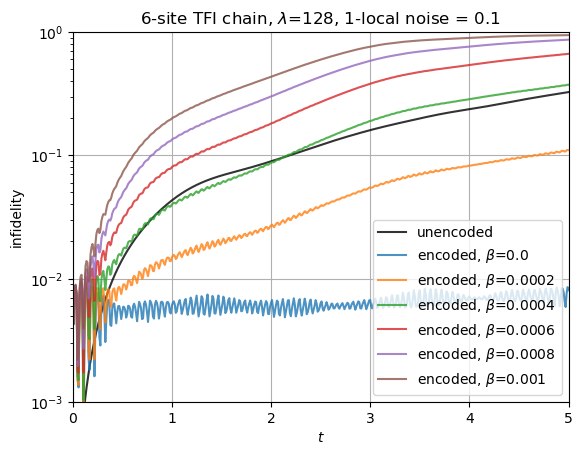

In [11]:
lamb = 128

##### unencoded #####
# for noise2loc in [0.0, 0.0002, 0.0004, 0.0006, 0.0008]:
for noise2loc in [0.0]:
    data_t, data_seed, data_infidelity = [], [], []

    f = open(f"1dTFIM_sweep_time_unencoded_6qubits_noise1loc=0.1_noise2loc={noise2loc}.txt")
    for line in f.readlines():
        line = line.strip().replace("#qubits =", "").replace("noise1loc =", "").replace("noise2loc =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace(",", "")
        _, _, _, t, seed, innerprod = line.split()
        data_t.append(float(t))
        data_seed.append(int(seed))
        data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
    f.close()

    df = pd.DataFrame(data={
        "t": data_t,
        "seed": data_seed,
        "infidelity": data_infidelity
    })

    newdf = df.groupby("t")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print("unencoded:")
    print(newdf)
    print("\n")
    t_arr = newdf["t"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    # plt.plot(t_arr, mean_arr, label=r"unencoded, $\beta$=" + f"{noise2loc}", alpha = 0.8)
    plt.plot(t_arr, mean_arr, label="unencoded", alpha = 0.8, color="black")
    plt.fill_between(t_arr, mean_arr + std_arr, mean_arr - std_arr, alpha = 0.5)


##### encoded #####
for noise2loc in [0.0, 0.0002, 0.0004, 0.0006, 0.0008, 0.001]:
    data_t, data_seed, data_infidelity = [], [], []

    f = open(f"1dTFIM_sweep_time_3blocks_noise1loc=0.1_noise2loc={noise2loc}_lamb={lamb}.txt")
    cnt = 0
    for line in f.readlines():
        line = line.strip().replace("#blocks =", "").replace("noise1loc =", "").replace("noise2loc =", "").replace("lamb =", "").replace(
            "t =", "").replace("seed =", "").replace("innerprod =", "").replace("leakage =", "").replace(
            "postsel_", "").replace(",", "")
        _, _, _, _, t, seed, innerprod, _, _ = line.split()
        if cnt % 1 == 0:
            data_t.append(float(t))
            data_seed.append(int(seed))
            data_infidelity.append(1 - abs(complex(innerprod)) ** 2)
        cnt += 1
    f.close()

    df = pd.DataFrame(data={
        "t": data_t,
        "seed": data_seed,
        "infidelity": data_infidelity
    })

    newdf = df.groupby("t")["infidelity"].agg(['count', 'mean', 'std']).reset_index()
    print(f"encoded, lamb={lamb}:")
    print(newdf)
    print("\n")
    t_arr = newdf["t"].to_numpy()
    mean_arr = newdf["mean"].to_numpy()
    std_arr = newdf["std"].to_numpy()

    plt.plot(t_arr, mean_arr, label= r"encoded, $\beta$=" + f"{noise2loc}", alpha = 0.8)
    plt.fill_between(t_arr, mean_arr + std_arr, mean_arr - std_arr, alpha = 0.5)

plt.ylim(0.001,1.0)
plt.xlim(0, 5)
plt.xlabel(r"$t$")
plt.ylabel("infidelity")
plt.yscale("log")
plt.title("6-site TFI chain, " + r"$\lambda$=" + f"{lamb}, 1-local noise = 0.1")
plt.legend()
plt.grid()
plt.savefig("sweep_time_with2localerror_lamb=128.pdf", format="pdf", bbox_inches="tight")
plt.show()